<a href="https://colab.research.google.com/github/y4c6/master_thesis/blob/main/EJMR_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package

In [1]:
from google.colab import drive
# directory
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import json

In [ ]:
pd.set_option('display.max_rows', None)

# No need

## Prepare dataset

## merge files (json to dict)

In [3]:
with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_1_10.json', 'r') as f:
    file1 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_11_20.json', 'r') as f:
    file2 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_21_30.json', 'r') as f:
    file3 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_31_44.json', 'r') as f:
    file4 = json.load(f)

In [4]:
def concat_json_files(files: list):
    # concatenate the file in the lists
    data = {'topic':[], 'posts':[]}
    for file in files:
      data['topic'].extend(file['topic'])
      data['posts'].extend(file['posts'])
    return data

data = concat_json_files([file1, file2, file3, file4])

## 確認合併成功
len(data['topic'])

293840

## dict to pd.dataframe

In [5]:
df = pd.DataFrame(data)
df.head(3)

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...


In [6]:
# check duplicate
df[df.topic.duplicated()==True].shape

df = df.drop_duplicates(subset=['topic'], keep="first")

print(df.shape)
df.head()

(292648, 2)


,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...
3,https://www.econjobrumors.com/topic/just-found...,[Why? Why would you ever study such a thing?]
4,https://www.econjobrumors.com/topic/karen-and-...,"[What happens next?, Mutant babies., Zhang pos..."


## Prepare y and X

In [7]:
asian_target = ['china', 'chinese', 'asia', 'asian', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']

In [10]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asian_target): #df['topic'].str.contains('china')
      return 'asian'
    else:
      return 'other'

# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asian


In [ ]:
df[df['Target'] == 'asian']

,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asian
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asian
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",asian
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,asian
79,https://www.econjobrumors.com/topic/us-uses-uk...,"[2014 Ukrainian ""revolution"" is just another 9...",asian
...,...,...,...
293436,https://www.econjobrumors.com/topic/top-16-chi...,[1\t[1]\tCentral University of Finance and Eco...,asian
293463,https://www.econjobrumors.com/topic/this-will-...,[Google is the first major tech company to bui...,asian
293767,https://www.econjobrumors.com/topic/chinabro-h...,[Long time Chinese user of EJMR. Mostly come h...,asian
293804,https://www.econjobrumors.com/topic/are-china-...,"[??, Indian? Probably no.\nAmerican? I mean Am...",asian


In [12]:
# Function to check if item is in the string and return the item
def check_item(string, items):
    found_items = []
    for item in items:
        if item in string.lower():
            found_items.append(item)
    return found_items if found_items else None

df['detail'] = df['topic'].apply(lambda x: check_item(x, asian_target))

In [ ]:
df.head(3)

,topic,posts,Target,detail
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other,None
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other,None
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asian,[china]


In [ ]:
df[df['Target'] != 'other']

,topic,posts,Target,detail
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,asian,[china]
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asian,"[asia, asian]"
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",asian,[china]
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,asian,[chinese]
79,https://www.econjobrumors.com/topic/us-uses-uk...,"[2014 Ukrainian ""revolution"" is just another 9...",asian,"[china, japan]"
...,...,...,...,...
293436,https://www.econjobrumors.com/topic/top-16-chi...,[1\t[1]\tCentral University of Finance and Eco...,asian,[chinese]
293463,https://www.econjobrumors.com/topic/this-will-...,[Google is the first major tech company to bui...,asian,[china]
293767,https://www.econjobrumors.com/topic/chinabro-h...,[Long time Chinese user of EJMR. Mostly come h...,asian,[china]
293804,https://www.econjobrumors.com/topic/are-china-...,"[??, Indian? Probably no.\nAmerican? I mean Am...",asian,[china]


In [13]:
# Flatten the series of lists into a single list
flattened_list = [item for sublist in df[df['Target'] != 'other']['detail'] for item in sublist]

# Count the occurrences of each item
item_counts = pd.Series(flattened_list).value_counts()


In [ ]:
item_counts

china        3823
chinese      1708
asia         1283
asian        1010
japan         603
korea         548
taiwan        333
korean        257
japanese      230
xinjiang       54
taiwanese      40
tibet          33
hongkong       19
dtype: int64

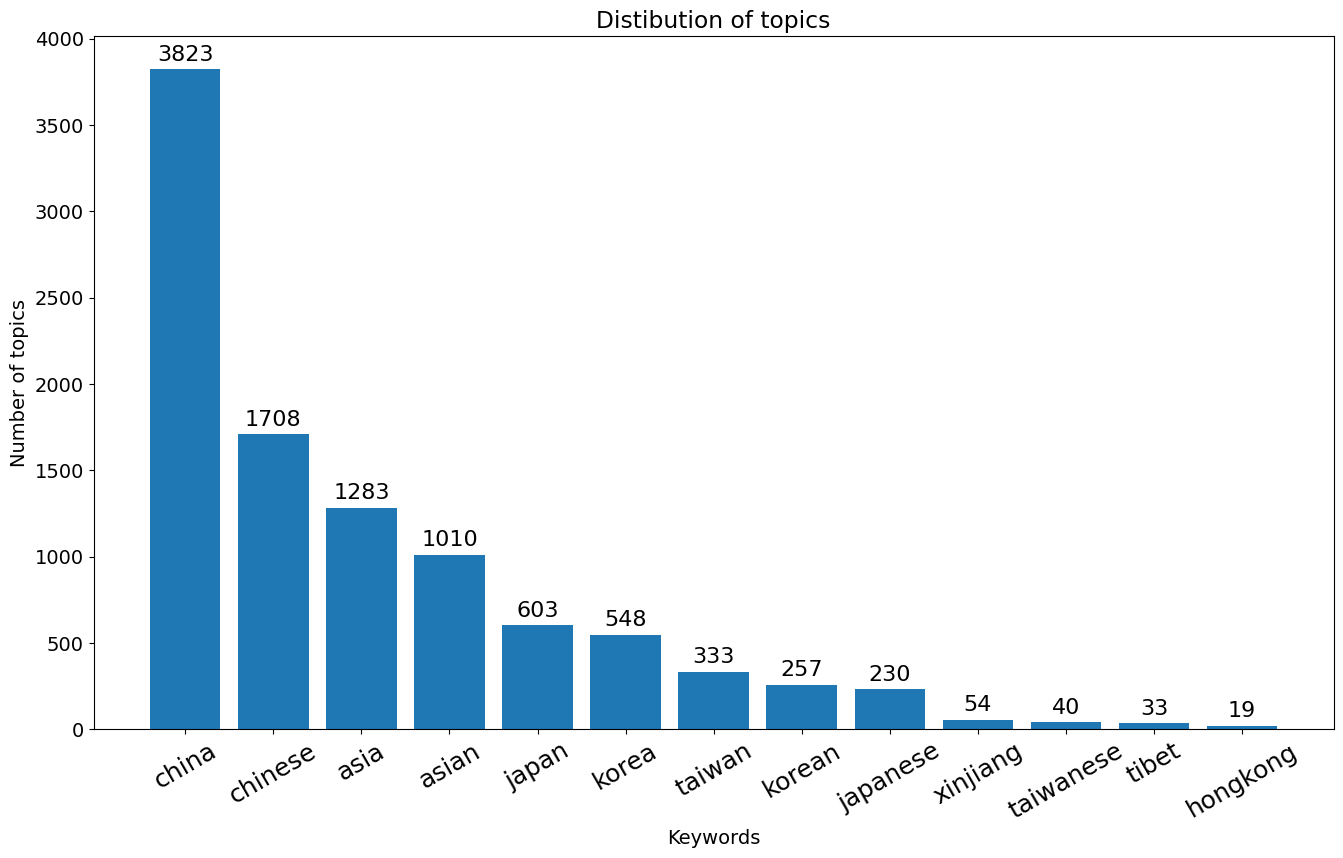

In [30]:
dfg = item_counts

# importing library
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels

# function to add value labels
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, y[i]+50, y[i], ha = 'center', fontsize=16)

if __name__ == '__main__':

	# creating data on which bar chart will be plot
	x = list(dfg.index)
	y = list(dfg.values)

	# setting figure size by using figure() function
	plt.figure(figsize = (16, 9))

	# making the bar chart on the data
	plt.bar(x, y)

	plt.xticks(rotation = 30)
	# calling the function to add value labels
	addlabels(x, y)

	# giving title to the plot
	plt.title('Distibution of topics')

	# giving X and Y labels
	plt.xlabel("Keywords")
	plt.ylabel("Number of topics")

	# visualizing the plot
	plt.show()

In [ ]:
df['topic'].str.contains('taiwanese').any()

True

## old ver

In [ ]:
asia_target = ['asia', 'asian', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']
china_target = ['china', 'chinese']

In [ ]:
both_target = asia_target + china_target
print(both_target)

['asia', 'asian', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang', 'china', 'chinese']


In [ ]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asia_target) and any( word in x for word in china_target): #series.str.contains('Mel').any()
        return "both"
    elif any( word in x for word in asia_target):
        return "asia"
    elif any( word in x for word in china_target):
        return "china"
    else:
        return "other"

# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china


In [ ]:
df.groupby('Target').size()

Target
asia       2508
both        282
china      5177
other    284681
dtype: int64

## Prepare df.y

## china vs other random

In [ ]:
df[df['Target'] == 'china'].shape

(5177, 3)

### 1:1 = china : other

In [ ]:
df_co = pd.concat([df[df['Target'] == 'china'],
          df[df['Target'] == 'other'].sample(n = df[df['Target'] == 'china'].shape[0], random_state=1941)])
print(df_co.shape)
df_co.head(3)

(10354, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china


In [ ]:
df_co['y'] = df_co['Target'].apply(lambda x: 1 if x == 'china' else 0)
df_co.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china,1


### 1:2 = china : other

In [ ]:
df_co2 = pd.concat([df[df['Target'] == 'china'],
          df[df['Target'] == 'other'].sample(n = df[df['Target'] == 'china'].shape[0]*2, random_state=1942)
          ])
print(df_co2.shape)
df_co2.head(3)

(15531, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china


In [ ]:
df_co2['y'] = df_co2['Target'].apply(lambda x: 1 if x == 'china' else 0)
df_co2.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1
69,https://www.econjobrumors.com/topic/chinese-br...,[Before the Olympics and during the Olympics a...,china,1


## asia (asia+china+both) vs random

In [ ]:
df[df['Target'] != 'other'].shape

(7967, 3)

### 1:1 = asia : other

In [ ]:
df_ao = pd.concat([df[df['Target'] != 'other'],
          df[df['Target'] == 'other'].sample(n = df[df['Target'] != 'other'].shape[0], random_state=2006)
          ])

print(df_ao.shape)
df_ao.head(3)

(15934, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [ ]:
df_ao['y'] = df_ao['Target'].apply(lambda x: 1 if x == 'asia' else 0)
df_ao.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,0
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,0


### 1:2 = asia : other

In [ ]:
df_ao2 = pd.concat([df[df['Target'] != 'other'],
          df[df['Target'] == 'other'].sample(n = df[df['Target'] != 'other'].shape[0]*2, random_state=1967)
          ])
print(df_ao2.shape)
df_ao2.head(3)

(23901, 3)


,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [ ]:
df_ao2['y'] = df_ao2['Target'].apply(lambda x: 1 if (x == 'asia')|(x=='china') else 0)
df_ao2.head(3)####

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1


In [ ]:
df_ao2.groupby(['y']).size()

y
0    16216
1     7685
dtype: int64

## Prepare X (Preprocessing, Stemming/Lemmatization)

In [ ]:
import nltk
nltk.download('punkt') #this is download for tonkenizer
nltk.download('wordnet')  # this is download for lemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')  # this is download for lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# 寫 Preprocessor 的 params functions

import string
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text
def preprocess_text(text):
  # Lowercase all characters
  text = text.lower()

  # Remove non-English sentences
  pattern = re.compile(r'[^\x00-\x7F]+')
  text = re.sub(pattern, '', text)

  # Remove URLs
  text = re.sub(r'https?://\S+', '', text)

  # Remove digits
  text = text.translate(str.maketrans('', '', string.digits))

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  return text


# Define a function to tokenize and remove stopwords from text and stemmer
def stemmer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Stem the tokens & remove the only character
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens if len(token) > 1]

  return tokens


# Define a function to tokenize and remove stopwords from text and lemmatize
def lemmatizer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if len(token) > 1]

  return tokens

In [ ]:
## check library # for what?
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Tokenization *4dataset *2token

## _co

In [ ]:
## the input type
df_co['stemmed_tokenized'] = df_co['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_co.shape)
df_co['lemmatized_tokenized'] = df_co['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_co.shape)

(10354, 5)
(10354, 6)


In [ ]:
print( df_co[df_co['lemmatized_tokenized'].str.len() == 0].shape)
print( df_co[df_co['stemmed_tokenized'].str.len() == 0].shape)

(264, 6)
(264, 6)


In [ ]:
# delete blank space
df_co = df_co[df_co['lemmatized_tokenized'].str.len() != 0]
print(df_co.shape)
df_co[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(10090, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"
69,1,"[olymp, olymp, news, whether, would, war, russ...","[olympics, olympics, news, whether, would, war..."


In [ ]:
df_co[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_tokens_a.pkl")

## _co2

In [ ]:
## the input type
df_co2['stemmed_tokenized'] = df_co2['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_co2.shape)
df_co2['lemmatized_tokenized'] = df_co2['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_co2.shape)

(15531, 5)
(15531, 6)


In [ ]:
print( df_co2[df_co2['lemmatized_tokenized'].str.len() == 0].shape)
print( df_co2[df_co2['stemmed_tokenized'].str.len() == 0].shape)

(371, 6)
(371, 6)


In [ ]:
# delete blank space
df_co2 = df_co2[df_co2['lemmatized_tokenized'].str.len() != 0]
print(df_co2.shape)
df_co2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(15160, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"
69,1,"[olymp, olymp, news, whether, would, war, russ...","[olympics, olympics, news, whether, would, war..."


In [ ]:
# save file
df_co2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co2_tokens_a.pkl")

## _ao

In [ ]:
## the input type
df_ao['stemmed_tokenized'] = df_ao['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_ao.shape)
df_ao['lemmatized_tokenized'] = df_ao['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_ao.shape)

(15934, 5)
(15934, 6)


In [ ]:
print( df_ao[df_ao['lemmatized_tokenized'].str.len() == 0].shape)
print( df_ao[df_ao['stemmed_tokenized'].str.len() == 0].shape)

(392, 6)
(392, 6)


In [ ]:
# delete blank space
df_ao = df_ao[df_ao['lemmatized_tokenized'].str.len() != 0]
print(df_ao.shape)
df_ao[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(15542, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


In [ ]:
# save file
df_ao[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao_tokens_a.pkl")

## _ao2

In [ ]:
## the input type
df_ao2['stemmed_tokenized'] = df_ao2['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_ao2.shape)
df_ao2['lemmatized_tokenized'] = df_ao2['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) )))
print(df_ao2.shape)

(23901, 5)
(23901, 6)


In [ ]:
print( df_ao2[df_ao2['lemmatized_tokenized'].str.len() == 0].shape)
print( df_ao2[df_ao2['stemmed_tokenized'].str.len() == 0].shape)

(564, 6)
(564, 6)


In [ ]:
# delete blank space
df_ao2 = df_ao2[df_ao2['lemmatized_tokenized'].str.len() != 0]
print(df_ao2.shape)
df_ao2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(23337, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


In [ ]:
# save file
df_ao2[['y', 'stemmed_tokenized', 'lemmatized_tokenized']]#.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao2_tokens_a0613.pkl")

# READ SAVED FILE

In [ ]:
#df_co = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_tokens_a.pkl")
df_co.shape

(10090, 3)

In [ ]:
df_co2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co2_tokens_a.pkl")
df_co2.shape

(15160, 3)

In [ ]:
#df_ao = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao_tokens_a.pkl")
df_ao.shape

(15542, 3)

In [ ]:
df_ao2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao2_tokens_a0613.pkl")
df_ao2.shape

(23337, 3)

# Word2Vec

In [ ]:
## check library
#import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#print(gensim.__version__)

In [ ]:
from gensim.models import Word2Vec


## setting
vector_size = 100
window = 5
min_count = 1
training_epochs = 20
topn = 100

In [ ]:
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()

# for i in range(len([df_co, df_co2, df_ao, df_ao2])):

#   df_list = [df_co, df_co2, df_ao, df_ao2]

#   corpus_stemmed = df_list[i]['stemmed_tokenized'].values

#   ## model
#   word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)

#   # Get the most similar words
#   w2v_stem_df = pd.DataFrame({'Word':[], 'Sims':[]})

#   for word in both_target:

#     word = stemmer.stem(word)

#     w2v_stem_df = w2v_stem_df.append({'Word':word, 'Sims':'sim'}, ignore_index=True)
#     w2v_stem_df = w2v_stem_df.append(pd.DataFrame(word2vec_stemmed.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']), ignore_index=True)

#   # print(w2v_stem_df.head(3))

#   filename = ['co', 'co2', 'ao', 'ao2']

#   print(filename[i])

#   #w2v_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_'+str(filename[i])+'_stem_a.csv')

co
co2
ao
ao2


In [ ]:
for i in range(len([df_co, df_co2, df_ao, df_ao2])):

  df_list = [df_co, df_co2, df_ao, df_ao2]

  corpus_lemma = df_list[i]['lemmatized_tokenized'].values

  ## model
  word2vec_lemma = Word2Vec(sentences=corpus_lemma, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)

  # Get the most similar words
  w2v_lemma_df = pd.DataFrame({'Word':[], 'Sims':[]})

  for word in both_target:

    w2v_lemma_df = w2v_lemma_df.append({'Word':word, 'Sims':'sim'}, ignore_index=True)
    w2v_lemma_df = w2v_lemma_df.append(pd.DataFrame(word2vec_lemma.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']), ignore_index=True)

  # print(w2v_lemma_df.head(3))

  filename = ['co', 'co2', 'ao', 'ao2']

  print(filename[i])

  #w2v_lemma_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_'+str(filename[i])+'_lemma_a.csv')

co
co2
ao
ao2


# w2v keyword

In [ ]:
targets = ['china', 'chinese', 'asia', 'asian']

In [ ]:
## stem token
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
co2_stem = df_co2['stemmed_tokenized'].values
co2_lemma = df_co2['lemmatized_tokenized'].values

ao2_stem = df_ao2['stemmed_tokenized'].values
ao2_lemma = df_ao2['lemmatized_tokenized'].values

In [ ]:
# w2v_co2_stem = Word2Vec(sentences=co2_stem, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
# w2v_co2_stem.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_stem.model")
# w2v_co2_lemma = Word2Vec(sentences=co2_lemma, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
# w2v_co2_lemma.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_lemma.model")

In [ ]:
# w2v_ao2_stem = Word2Vec(sentences=ao2_stem, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
# w2v_ao2_stem.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_stem.model")
# w2v_ao2_lemma = Word2Vec(sentences=ao2_lemma, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)
# w2v_ao2_lemma.save("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_lemma.model")

load w2v model

In [ ]:
# w2v_co2_stem = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_stem.model")
# w2v_co2_lemma = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_co2_lemma.model")

In [ ]:
w2v_ao2_stem = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_stem.model")
w2v_ao2_lemma = Word2Vec.load("/content/gdrive/MyDrive/Thesis_Data&Result/COAO/w2v_ao2_lemma.model")

### stemming

In [ ]:
word = 'toilet'

print(stemmer.stem(word))

display(pd.DataFrame(w2v_co2_stem.wv.most_similar(stemmer.stem(word), topn=topn), columns=['Word', 'Sims']))


toilet


,Word,Sims
0,rubbish,0.553747
1,twnese,0.512570
2,flush,0.504447
3,unclog,0.474308
4,sewag,0.456135
5,mathbat,0.429501
6,confirmado,0.428362
7,shakier,0.411904
8,frng,0.405031
9,nyui,0.390153


### lemma

In [ ]:
word = 'toilet'

print(word)

display(pd.DataFrame(w2v_ao2_lemma.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']))

toilet


,Word,Sims
0,unclog,0.477157
1,zhen,0.476737
2,flushing,0.446416
3,selfrezpect,0.438336
4,stter,0.438165
5,flushed,0.434844
6,flushable,0.427157
7,vietnamsouth,0.427111
8,paperapple,0.424876
9,fuuuuutuuuree,0.418524


# w2v loop

In [ ]:
targets = ['china', 'chinese', 'asia', 'asian']

In [ ]:
asian_target = ['china', 'chinese', 'asia', 'asian', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()


def W2V_df_generator(model, tokenizor, words, topn):

  df_w2v_list = []

  for w in range(len(words)):

    if tokenizor == 'stem':
      word = stemmer.stem(words[w])
    else:
      word = words[w]

    sim_df = pd.DataFrame(model.wv.most_similar(word, topn=topn), columns=['Word', 'Sims'])
    sim_df.iloc[0] = [word, '----']

    df_w2v_list.append(
        sim_df
        )

    df_w2v = pd.concat(df_w2v_list, axis=1, ignore_index=True)

  return df_w2v


In [ ]:
targets = asian_target

In [ ]:
# w2v_co2_stem_df = W2V_df_generator(w2v_co2_stem, 'stem', targets, 100)
# print('ready')
# w2v_co2_lemma_df = W2V_df_generator(w2v_co2_lemma, 'lemma', targets, 100)
# print('ready')
w2v_ao2_stem_df = W2V_df_generator(w2v_ao2_stem, 'stem', targets, 100)
print('ready')
w2v_ao2_lemma_df = W2V_df_generator(w2v_ao2_lemma, 'lemma', targets, 100)
print('ready')

ready
ready


In [ ]:
# w2v_co2_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_co2_stem_a_100.csv')
# w2v_co2_lemma_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_co2_lemma_a_100.csv')
w2v_ao2_stem_df.to_csv('/content/gdrive/Shareddrives/Files_forMeeting/Meeting_0619/EJMR_W2V_stem_a_100.csv')
w2v_ao2_lemma_df.to_csv('/content/gdrive/Shareddrives/Files_forMeeting/Meeting_0619/EJMR_W2V_lemma_a_100.csv')

In [ ]:
def Displayer(i:int):

  df_list = [w2v_ao2_stem_df, w2v_ao2_lemma_df] #w2v_co2_stem_df, w2v_co2_lemma_df,

  display(df_list[i])

In [ ]:
Displayer(0)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,china,----,chines,----,asia,----,asian,----,korea,----,...,taiwan,----,taiwanes,----,hongkong,----,tibet,----,xinjiang,----
1,us,0.658694,mainland,0.583404,europ,0.644357,white,0.594258,carolinachapelhil,0.651407,...,hk,0.658271,chines,0.625542,kowloon,0.556317,xinjiang,0.598966,tibet,0.598966
2,ccp,0.629655,china,0.578324,southeast,0.598235,asianamerican,0.589319,tinton,0.644728,...,mainland,0.645739,taiwan,0.589087,hknese,0.528463,aksai,0.577942,kazakstani,0.569259
3,countri,0.579109,nonchines,0.558792,turkistan,0.595839,azn,0.585742,xhina,0.643393,...,taiwanes,0.589087,hk,0.586074,mainland,0.523669,roc,0.552571,prisoncamp,0.514451
4,chines,0.578324,foreign,0.529495,africa,0.581366,discrimin,0.539193,masondixon,0.623716,...,singapor,0.567342,singaporean,0.571366,taiwan,0.506358,manchuria,0.546929,uygur,0.510608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,uss,0.361086,golddigg,0.31543,americaneurophilia,0.377039,race,0.371331,masknot,0.381845,...,nvke,0.36073,chinabro,0.356663,reunitesg,0.36182,tibetdalai,0.392927,yak,0.35065
96,chainuh,0.36063,ukrainianrussian,0.315211,finland,0.376569,matriarch,0.371161,israel,0.379132,...,rico,0.360627,hong,0.355889,genoa,0.361587,dummber,0.392381,encamp,0.350409
97,manchurian,0.359346,folktal,0.314343,region,0.376375,thirld,0.370428,californiadavi,0.376975,...,senkaku,0.36059,brit,0.355857,bhutan,0.360858,anp,0.392269,loot,0.350218
98,soviet,0.359244,other,0.314082,brazilsouth,0.374355,male,0.370168,kosovo,0.376409,...,dprk,0.359658,malelin,0.355513,wchina,0.360488,tshaines,0.39156,zhynes,0.35005


# word check

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'stronker'

In [ ]:
lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('stronker')

'stronker'

In [ ]:
stemmer.stem('innorman')

'innormani'

# old w2v

In [ ]:
## model
word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs)

# Get the most similar words
w2v_stem_df = pd.DataFrame({'Word':[], 'Sims':[]})

for word in both_target:

  word = stemmer.stem(word)

  w2v_stem_df = w2v_stem_df.append({'Word':word, 'Sims':'sim'}, ignore_index=True)
  w2v_stem_df = w2v_stem_df.append(pd.DataFrame(word2vec_stemmed.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']), ignore_index=True)

print(w2v_stem_df.head(10))

            Word      Sims
0           asia       sim
1        asiaand   0.59111
2      turkestan  0.580022
3      turkistan  0.568644
4        saracen  0.567836
5          europ  0.542821
6          asian       sim
7  asianamerican  0.623744
8          white  0.599755
9        nonwhit  0.587919


In [ ]:
#w2v_stem_df.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_ao_stem_a.csv')

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/COAO/EJMR_W2V_ao2_stem_a.csv',index_col=0)

,Word,Sims
0,asia,sim
1,asiahow,0.6978613138198853
2,turkistan,0.6449009776115417
3,europ,0.6376199722290039
4,emprici,0.5823258757591248
...,...,...
73,taiwanes,0.6516825556755066
74,china,0.5568276643753052
75,foreign,0.5489208102226257
76,mainland,0.534944474697113


# LASSO

## BOW via CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy,
            tokenizer = dummy,
            strip_accents = 'ascii',
            max_features = 10000)

## Remove Targets from BOW

In [ ]:
# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (both_target)]

# Applying the conditions
df_ao['lemmatized_cleaned'] = df_ao['lemmatized_tokenized'].apply(remove_target)
df_ao['stemmed_cleaned'] = df_ao['stemmed_tokenized'].apply(remove_target)
df_ao.head(3)

,y,stemmed_tokenized,lemmatized_tokenized,lemmatized_cleaned,stemmed_cleaned
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina...","[genius, outcome, west, looking, russian, fina...","[geniu, outcom, west, look, russian, financ, t..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer...","[even, accounting, indian, quant, club, univer...","[even, account, indian, quant, club, univers, ..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]","[never, forget, never, forgive]","[never, forget, never, forgiv]"


## 得到 lemmatized 或 stemmed 的 X

### lemma_co

In [ ]:
lemmatized_matrix = vectorizer.fit_transform(df_co['lemmatized_cleaned'])

# Print the matrix
print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(15542, 10000)


In [ ]:
data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_co.y)

print(data_lemma.shape)
data_lemma.head(3)

(10090, 10001)


,aa,aaea,ab,abadie,abandon,abandoned,abandoning,abc,abdc,abel,...,zju,zombie,zone,zoom,zoomers,zou,zu,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_co_a.pkl")

### stem_co

In [ ]:
stemmed_matrix = vectorizer.fit_transform(df_co['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
print(stemmed_matrix.toarray())

(10090, 10000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_co.y)

print(data_stem.shape)
data_stem.head(3)

(10090, 10001)


,aa,aaea,ab,abadi,abandon,abbrevi,abc,abd,abdc,abel,...,zoo,zoom,zoomer,zoonot,zou,zu,zuckerberg,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_co_a.pkl")

### lemma_co2 & stem_co2

In [ ]:
#df_co2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co2_tokens.pkl")
print(df_co2.shape)

from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy,
            tokenizer = dummy,
            strip_accents = 'ascii',
            max_features = 10000)

# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (china_target)]

# Applying the conditions
df_co2['lemmatized_cleaned'] = df_co2['lemmatized_tokenized'].apply(remove_target)
df_co2['stemmed_cleaned'] = df_co2['stemmed_tokenized'].apply(remove_target)
# df_co.head(3)

# Lemma BOW ####
lemmatized_matrix = vectorizer.fit_transform(df_co2['lemmatized_cleaned'])

# Print the matrix
# print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_co2.y)

print(data_lemma.shape)
data_lemma.head(3)

# save to file
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_co2_a.pkl")

# Stem BOW ####
stemmed_matrix = vectorizer.fit_transform(df_co2['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
# print(stemmed_matrix.toarray())

data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_co2.y)

print(data_stem.shape)
data_stem.head(3)

# save to file
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_co2_a.pkl")

(15160, 3)
(15160, 10000)
(15160, 10001)
(15160, 10000)
(15160, 10001)


### lemma_ao & stem_ao

In [ ]:
#df_ao = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao_tokens.pkl")
print(df_ao.shape)

from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy,
            tokenizer = dummy,
            strip_accents = 'ascii',
            max_features = 10000)

# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (both_target)]

# Applying the conditions
df_ao['lemmatized_cleaned'] = df_ao['lemmatized_tokenized'].apply(remove_target)
df_ao['stemmed_cleaned'] = df_ao['stemmed_tokenized'].apply(remove_target)
# df_co.head(3)

# Lemma BOW ####
lemmatized_matrix = vectorizer.fit_transform(df_ao['lemmatized_cleaned'])

# Print the matrix
# print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_ao.y)

print(data_lemma.shape)
data_lemma.head(3)

# save to file
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_ao_a.pkl")

# Stem BOW ####
stemmed_matrix = vectorizer.fit_transform(df_ao['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
# print(stemmed_matrix.toarray())

data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_ao.y)

print(data_stem.shape)
data_stem.head(3)

# save to file
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_ao_a.pkl")

(15542, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(15542, 10000)
(15542, 10001)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(15542, 10000)
(15542, 10001)


### lemma_ao2 & stem_ao2

In [ ]:
#df_ao2 = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_ao2_tokens.pkl")
print(df_ao2.shape)

from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy,
            tokenizer = dummy,
            strip_accents = 'ascii',
            max_features = 10000)

# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (both_target)]

# Applying the conditions
df_ao2['lemmatized_cleaned'] = df_ao2['lemmatized_tokenized'].apply(remove_target)
df_ao2['stemmed_cleaned'] = df_ao2['stemmed_tokenized'].apply(remove_target)
# df_co.head(3)

# Lemma BOW ####
lemmatized_matrix = vectorizer.fit_transform(df_ao2['lemmatized_cleaned'])

# Print the matrix
# print(lemmatized_matrix.toarray())
print(lemmatized_matrix.toarray().shape)

data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df_ao2.y)

print(data_lemma.shape)
data_lemma.head(3)

# save to file
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_ao2_a.pkl")

# Stem BOW ####
stemmed_matrix = vectorizer.fit_transform(df_ao2['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray().shape)
# print(stemmed_matrix.toarray())

data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df_ao2.y)

print(data_stem.shape)
data_stem.head(3)

# save to file
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_ao2_a.pkl")

(23337, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23337, 10000)
(23337, 10000)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(23337, 10000)
(23337, 10001)


# read saved pickle

In [ ]:
data_lemma = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_co_a.pkl")
print(data_lemma.shape)
data_lemma.head()

(10090, 10001)


,aa,aaea,ab,abadie,abandon,abandoned,abandoning,abc,abdc,abel,...,zju,zombie,zone,zoom,zoomers,zou,zu,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
top500 = data_lemma[data_lemma.columns].sum(axis=0)[:-1].sort_values(ascending=False)[:500]

pd.DataFrame({'word': top500.index,
       'count': top500})#.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/Top500_lemma.csv')

In [ ]:
data_stem = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_co_a.pkl")
print(data_stem.shape)
data_stem.head()

(10090, 10001)


,aa,aaea,ab,abadi,abandon,abbrevi,abc,abd,abdc,abel,...,zoo,zoom,zoomer,zoonot,zou,zu,zuckerberg,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
top500 = data_stem[data_stem.columns].sum(axis=0)[:-1].sort_values(ascending=False)[:500]

pd.DataFrame({'word': top500.index,
       'count': top500}).to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/Top500_stem.csv')

# run

split

In [ ]:
from sklearn.model_selection import train_test_split

co

In [ ]:
train_stem_co, test_stem_co = train_test_split(data_stem, test_size=0.5,  random_state = 3104, shuffle=True)

In [ ]:
print('Shape of training set: ', train_stem_co.shape)
print('Shape of testing set: ', test_stem_co.shape)

Shape of training set:  (5045, 10001)
Shape of testing set:  (5045, 10001)


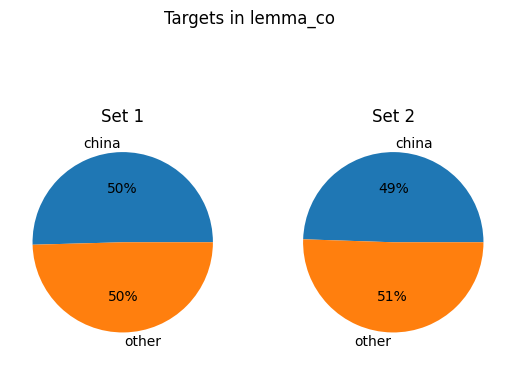

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].pie(train_lemma_co.groupby(['y']).size(),
        labels = ['china', 'other'],
         autopct = '%1.0f%%',
         )
ax[0].set_title('Set 1')

ax[1].pie(test_lemma_co.groupby(['y']).size(),
        labels = ['china', 'other'],
         autopct = '%1.0f%%',
         )
ax[1].set_title('Set 2')

fig.suptitle('Targets in lemma_co')
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV(tol=0.01)
clf.fit(train_stem_co.loc[:, train_stem_co.columns != 'y'], train_stem_co['y'])

print(len(clf.coef_[clf.coef_!=0]))

stemmed_D = data_stem.keys()[:-1][clf.coef_!=0] # remove y
print(stemmed_D)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+01, tolerance: 1.009e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.079e+01, tolerance: 1.009e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.803e+01, tolerance: 1.009e

In [ ]:
pd.Series(stemmed_D).to_csv(r'/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_stem_D_a.csv', index=False, header=False)

In [ ]:
stemmed_D = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_co_stem_D_a.csv', header=None)
print(stemmed_D)

            0
0    american
1         ccp
2     country
3         get
4   happiness
5          im
6         job
7        like
8       paper
9      people
10        phd
11          u
12          w
13       work
14      world
15         xi


# DoubleML

# correlation

In [ ]:
data_stem = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_ao2_a.pkl")
data_stem.rename(columns = {'y':'asian'}, inplace = True)

In [ ]:
Dstem = ['hardwork', 'cheat', 'encourag', 'brainwash', 'creativ', 'stpid', 'mediocr', 'talent', 'rubbish', 'trash', 'rag', 'shit', 'shiet', 'shi', 'shame', 'weak', 'weaker', 'solid', 'stronger', 'strongest', 'great', 'impress', 'terribl']
print(len(Dstem))
data_stem = data_stem[Dstem]
print(data_stem.shape)

['hardwork', 'cheat', 'encourag', 'brainwash', 'creativ', 'stpid', 'mediocr', 'talent', 'rubbish', 'trash', 'rag', 'shit', 'shiet', 'shi', 'shame', 'weak', 'weaker', 'solid', 'stronger', 'strongest', 'great', 'impress', 'terribl']
(23337, 23)


In [ ]:
data_stem.corr(method='pearson').to_csv('/content/gdrive/Shareddrives/Files_forMeeting/Meeting_0622/corr_stem_2.csv')

------

In [ ]:
data_lemma = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_ao2_a_0613.pkl")

In [ ]:
Dlemma = ['brainwashed', 'mediocre', 'fk', 'mf', 'shit', 'rubbish', 'trash', 'weak', 'weaker', 'weakest', 'bright', 'shamed', 'shameful', 'disappointing', 'fierce', 'terrible', 'embarrassing']
print(len(Dlemma))
data_lemma = data_lemma[Dlemma]
print(data_lemma.shape)

['brainwashed', 'mediocre', 'fk', 'mf', 'shit', 'rubbish', 'trash', 'weak', 'weaker', 'weakest', 'bright', 'shamed', 'shameful', 'disappointing', 'fierce', 'terrible', 'embarrassing']
(23337, 17)


In [ ]:
data_lemma.corr(method='pearson').to_csv('/content/gdrive/Shareddrives/Files_forMeeting/Meeting_0622/corr_lemma_2.csv')